In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# In the next cell, add the following code that 
# we used to generate the random latitudes. Also, 
# we'll create a similar code snippet that will 
# generate longitudes. To ensure enough latitudes 
# and longitudes, we'll start with 1,500. In 
# addition, we'll pack the latitudes (lats) and 
# longitudes (lngs) as pairs by zipping them 
# (lat_lngs) with the zip() function.

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# You can only unzip a zipped tuple once before it is 
# removed from the computer's memory. Make sure you 
# unzip the latitudes and longitudes into the 
# coordinates list before moving on.

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [8]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abb9d2237b6ae29027e3e0f77f22c151


In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao jose da coroa grande
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | soddy-daisy
Processing Record 5 of Set 1 | mangrol
Processing Record 6 of Set 1 | miranorte
City not found. Skipping...
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | muzaffarpur
Processing Record 9 of Set 1 | axim
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | darhan
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | dongsheng
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | batemans bay
Processing Record 20 of Set 1 | roald
Processing Record 21 of Set 1 | chuy
Pr

Processing Record 39 of Set 4 | manaure
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | beterou
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | malakal
Processing Record 45 of Set 4 | juan lacaze
Processing Record 46 of Set 4 | andenes
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | ust-bolsheretsk
City not found. Skipping...
Processing Record 49 of Set 4 | vostok
Processing Record 50 of Set 4 | wanaka
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | catuday
Processing Record 3 of Set 5 | muroto
Processing Record 4 of Set 5 | serra
Processing Record 5 of Set 5 | quang ngai
Processing Record 6 of Set 5 | aden
Processing Record 7 of Set 5 | alamogordo
Processing Record 8 of Set 5 | acapulco
Processing Record 9 of Set 5 | chama
Processing Record 10 of Set 5 | funadhoo
Processing Record 11 of Set 5 | saldanha
Processing Record 12 of Set 5 | san benito abad
Processi

Processing Record 24 of Set 8 | coquimbo
Processing Record 25 of Set 8 | ust-kuyga
Processing Record 26 of Set 8 | avarua
Processing Record 27 of Set 8 | talnakh
Processing Record 28 of Set 8 | plettenberg bay
Processing Record 29 of Set 8 | hualmay
Processing Record 30 of Set 8 | isangel
Processing Record 31 of Set 8 | ugoofaaru
Processing Record 32 of Set 8 | areka
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | taltal
Processing Record 35 of Set 8 | burkhala
City not found. Skipping...
Processing Record 36 of Set 8 | seydi
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | seddon
Processing Record 39 of Set 8 | uralskiy
City not found. Skipping...
Processing Record 40 of Set 8 | ati
Processing Record 41 of Set 8 | uvinza
Processing Record 42 of Set 8 | rabo de peixe
Processing Record 43 of Set 8 | baruun-urt
Processing Record 44 of Set 8 | holme
Processing Record 45 of Set 8 | issa
Processing Record 46 of Set 8 | minab
Processing Rec

Processing Record 15 of Set 12 | zonguldak
Processing Record 16 of Set 12 | olafsvik
Processing Record 17 of Set 12 | cheremkhovo
Processing Record 18 of Set 12 | pudozh
Processing Record 19 of Set 12 | shache
Processing Record 20 of Set 12 | svetlogorsk
Processing Record 21 of Set 12 | imeni poliny osipenko
Processing Record 22 of Set 12 | tabou
Processing Record 23 of Set 12 | billings
Processing Record 24 of Set 12 | nador
Processing Record 25 of Set 12 | maumere
Processing Record 26 of Set 12 | price
Processing Record 27 of Set 12 | aktas
Processing Record 28 of Set 12 | nizhnevartovsk
Processing Record 29 of Set 12 | henties bay
Processing Record 30 of Set 12 | sambava
Processing Record 31 of Set 12 | gazojak
Processing Record 32 of Set 12 | kuching
Processing Record 33 of Set 12 | matera
Processing Record 34 of Set 12 | belyy yar
Processing Record 35 of Set 12 | havelock
Processing Record 36 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 12 | newport

In [10]:
len(city_data)

541

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Jose Da Coroa Grande,-8.8978,-35.1478,81.23,76,50,8.03,BR,2021-04-14 18:48:59
1,Punta Arenas,-53.1500,-70.9167,44.01,70,11,21.00,CL,2021-04-14 18:48:59
2,Mar Del Plata,-38.0023,-57.5575,75.20,53,20,16.11,AR,2021-04-14 18:49:00
3,Soddy-Daisy,35.2359,-85.1908,75.99,50,100,6.64,US,2021-04-14 18:49:00
4,Mangrol,21.1167,70.1167,80.19,61,0,8.16,IN,2021-04-14 18:47:16
5,Saint-Pierre,-21.3393,55.4781,77.00,78,0,17.27,RE,2021-04-14 18:49:00
6,Muzaffarpur,26.1167,85.4000,77.00,44,20,1.81,IN,2021-04-14 18:49:01
7,Axim,4.8699,-2.2405,81.52,80,100,9.84,GH,2021-04-14 18:49:01
8,Jamestown,42.0970,-79.2353,61.00,38,20,11.50,US,2021-04-14 18:49:01
9,Albany,42.6001,-73.9662,71.60,42,40,1.41,US,2021-04-14 18:48:39


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Jose Da Coroa Grande,BR,2021-04-14 18:48:59,-8.8978,-35.1478,81.23,76,50,8.03
1,Punta Arenas,CL,2021-04-14 18:48:59,-53.1500,-70.9167,44.01,70,11,21.00
2,Mar Del Plata,AR,2021-04-14 18:49:00,-38.0023,-57.5575,75.20,53,20,16.11
3,Soddy-Daisy,US,2021-04-14 18:49:00,35.2359,-85.1908,75.99,50,100,6.64
4,Mangrol,IN,2021-04-14 18:47:16,21.1167,70.1167,80.19,61,0,8.16
...,...,...,...,...,...,...,...,...,...
536,Newport,GB,2021-04-14 18:51:34,51.5877,-2.9984,51.01,57,9,6.91
537,Salym,RU,2021-04-14 18:51:34,60.0625,71.4789,44.31,98,100,6.67
538,Omsukchan,RU,2021-04-14 18:51:34,62.5333,155.8000,0.61,96,100,3.02
539,Bambous Virieux,MU,2021-04-14 18:51:35,-20.3428,57.7575,79.00,78,40,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

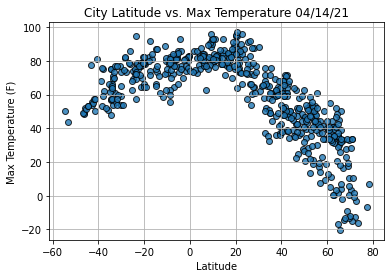

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

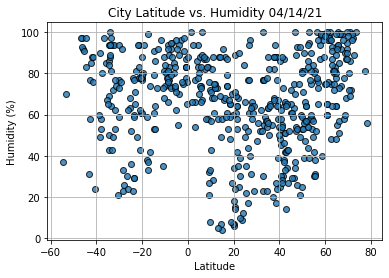

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

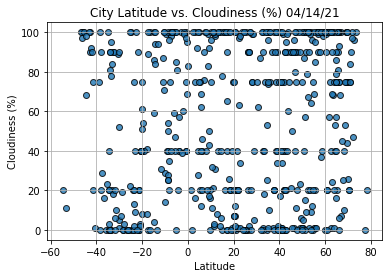

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

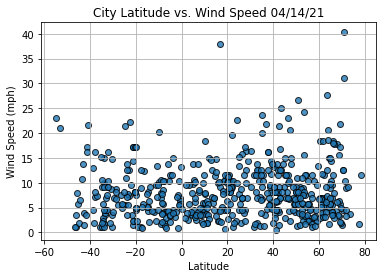

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# To determine how strong the relationship is between the fitted 
# line and the data, we find the correlation coefficient, or 
# r-value. A correlation coefficient close to 1 shows a strong 
# positive correlation, whereas close to –1 shows a strong 
# negative correlation. A correlation coefficient close to zero 
# is no correlation.

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Jose Da Coroa Grande,BR,2021-04-14 18:48:59,-8.8978,-35.1478,81.23,76,50,8.03
1,Punta Arenas,CL,2021-04-14 18:48:59,-53.1500,-70.9167,44.01,70,11,21.00
2,Mar Del Plata,AR,2021-04-14 18:49:00,-38.0023,-57.5575,75.20,53,20,16.11
3,Soddy-Daisy,US,2021-04-14 18:49:00,35.2359,-85.1908,75.99,50,100,6.64
4,Mangrol,IN,2021-04-14 18:47:16,21.1167,70.1167,80.19,61,0,8.16
...,...,...,...,...,...,...,...,...,...
536,Newport,GB,2021-04-14 18:51:34,51.5877,-2.9984,51.01,57,9,6.91
537,Salym,RU,2021-04-14 18:51:34,60.0625,71.4789,44.31,98,100,6.67
538,Omsukchan,RU,2021-04-14 18:51:34,62.5333,155.8000,0.61,96,100,3.02
539,Bambous Virieux,MU,2021-04-14 18:51:35,-20.3428,57.7575,79.00,78,40,8.05


In [22]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame. 
# The loc method accesses a group of rows and columns 
# in the current DataFrame by an index, labels, or a 
# Boolean array. The syntax to get a specific row 
# from a current DataFrame is row = df.loc[row_index].

In [23]:
index13 = city_data_df.loc[13]

In [24]:
index13

City                      Rikitea
Country                        PF
Date          2021-04-14 18:46:25
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    77.77
Humidity                       71
Cloudiness                      9
Wind Speed                   7.36
Name: 13, dtype: object

In [25]:
# We can also filter a DataFrame based on a value 
# of a row. For instance, if we wanted to get all 
# Northern Hemisphere latitudes, for latitudes 
# greater than or equal to 0, we can filter the 
# city_data_df DataFrame using the code 
# city_data_df["Lat"] >= 0. Executing this code 
# will return either "True" or "False" for all 
# the rows that meet these criteria.

city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
536     True
537     True
538     True
539    False
540     True
Name: Lat, Length: 541, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Soddy-Daisy,US,2021-04-14 18:49:00,35.2359,-85.1908,75.99,50,100,6.64
4,Mangrol,IN,2021-04-14 18:47:16,21.1167,70.1167,80.19,61,0,8.16
6,Muzaffarpur,IN,2021-04-14 18:49:01,26.1167,85.4000,77.00,44,20,1.81
7,Axim,GH,2021-04-14 18:49:01,4.8699,-2.2405,81.52,80,100,9.84
8,Jamestown,US,2021-04-14 18:49:01,42.0970,-79.2353,61.00,38,20,11.50


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [28]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Soddy-Daisy,US,2021-04-14 18:49:00,35.2359,-85.1908,75.99,50,100,6.64
4,Mangrol,IN,2021-04-14 18:47:16,21.1167,70.1167,80.19,61,0,8.16
6,Muzaffarpur,IN,2021-04-14 18:49:01,26.1167,85.4000,77.00,44,20,1.81
7,Axim,GH,2021-04-14 18:49:01,4.8699,-2.2405,81.52,80,100,9.84
8,Jamestown,US,2021-04-14 18:49:01,42.0970,-79.2353,61.00,38,20,11.50
...,...,...,...,...,...,...,...,...,...
535,Havelock,US,2021-04-14 18:51:34,34.8791,-76.9013,71.60,56,1,11.50
536,Newport,GB,2021-04-14 18:51:34,51.5877,-2.9984,51.01,57,9,6.91
537,Salym,RU,2021-04-14 18:51:34,60.0625,71.4789,44.31,98,100,6.67
538,Omsukchan,RU,2021-04-14 18:51:34,62.5333,155.8000,0.61,96,100,3.02


In [29]:
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Jose Da Coroa Grande,BR,2021-04-14 18:48:59,-8.8978,-35.1478,81.23,76,50,8.03
1,Punta Arenas,CL,2021-04-14 18:48:59,-53.1500,-70.9167,44.01,70,11,21.00
2,Mar Del Plata,AR,2021-04-14 18:49:00,-38.0023,-57.5575,75.20,53,20,16.11
5,Saint-Pierre,RE,2021-04-14 18:49:00,-21.3393,55.4781,77.00,78,0,17.27
13,Rikitea,PF,2021-04-14 18:46:25,-23.1203,-134.9692,77.77,71,9,7.36
...,...,...,...,...,...,...,...,...,...
505,Kalabo,ZM,2021-04-14 18:51:25,-14.9700,22.6814,65.28,79,59,7.76
525,Maumere,ID,2021-04-14 18:51:31,-8.6199,122.2111,78.42,81,25,5.88
529,Henties Bay,NA,2021-04-14 18:51:32,-22.1160,14.2845,76.96,49,0,9.64
530,Sambava,MG,2021-04-14 18:51:32,-14.2667,50.1667,76.93,86,100,6.40


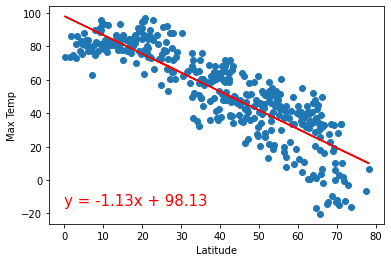

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-15))

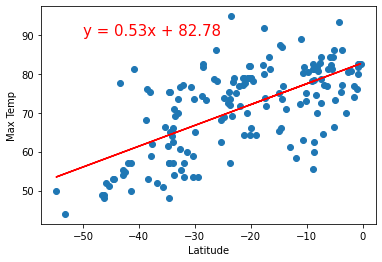

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

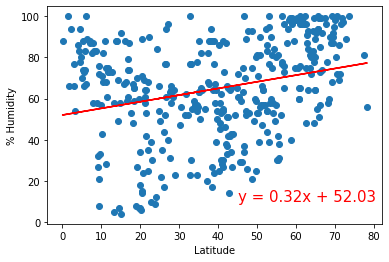

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,10))